## Data basic information

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('column_3C_weka.csv')

In [3]:
data.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


Spondylolisthesis    150
Normal               100
Hernia                60
Name: class, dtype: int64

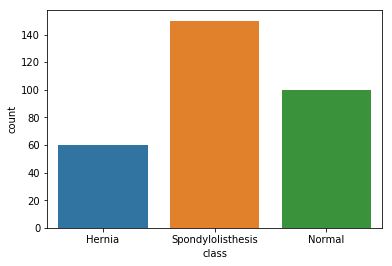

In [4]:
sns.countplot(x="class", data=data)
data['class'].value_counts()

# KNN 分类模型

## KNN using train_test_split

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

x,y = data.loc[:,data.columns != 'class'], data[['class']]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)

#### Choose hyperparameter for KNN

Best accuracy is 0.8602150537634409 with K = 13


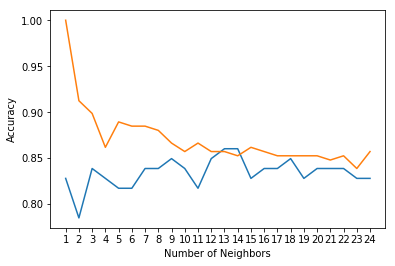

In [6]:
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(neig):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    train_accuracy.append(knn.score(x_train, y_train))
    test_accuracy.append(knn.score(x_test, y_test))

plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

## KNN using CV

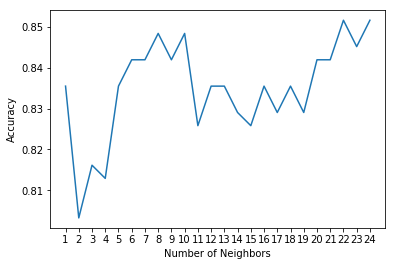

In [7]:
from sklearn.model_selection import cross_val_score

neig = np.arange(1, 25)
CV_scores = []

for i, k in enumerate(neig):
    knn = KNeighborsClassifier(n_neighbors = k)
    CV_score = cross_val_score(knn,x,y,cv=10).mean()
    CV_scores.append(CV_score)

plt.plot(neig, CV_scores, label = 'Testing Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
print()

## LinearRegression (回归问题)

### Scatter

Text(0,0.5,'sacral_slope')

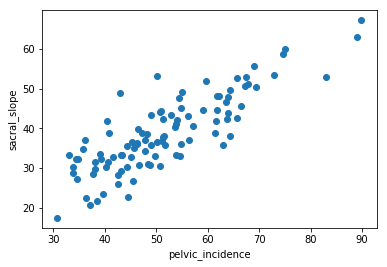

In [8]:
normal = data[data['class'] =='Normal']
x = np.array(normal.loc[:,'pelvic_incidence']).reshape(-1,1)
y = np.array(normal.loc[:,'sacral_slope']).reshape(-1,1)

plt.scatter(x=x,y=y)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')

R^2 score:  0.7032892655693301
coefs: [[0.65255577]]


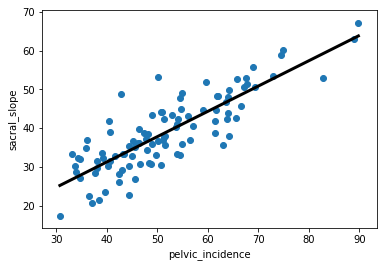

In [9]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
predict_space = np.linspace(min(x), max(x)).reshape(-1,1)
reg.fit(x,y)
predicted = reg.predict(predict_space)
print('R^2 score: ',reg.score(x, y))

plt.plot(predict_space, predicted, color='black', linewidth=3)
plt.scatter(x=x,y=y)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
print('coefs:', reg.coef_)

## Regularized Regression

In [170]:
normal = data[data['class'] =='Normal'].drop('class',axis=1)
normal_x = np.array(normal.loc[:,normal.columns != 'sacral_slope'])
normal_y = np.array(normal.loc[:,'sacral_slope']).reshape(-1,1)

## Ridge

#### Train_test_split 算R2 score

In [149]:
from sklearn.linear_model import Ridge

x_train,x_test,y_train,y_test = train_test_split(normal_x,normal_y, test_size = 0.3)

ridge = Ridge(alpha = 0.1, normalize = True)
ridge.fit(x_train,y_train)
ridge_predict = ridge.predict(x_test)
print('Ridge score: ',ridge.score(x_test,y_test))

Ridge score:  0.9521916515876719


#### CV 算coefs

In [131]:
from sklearn import cross_validation

k_fold = cross_validation.KFold(n=len(normal_x),n_folds=10) 
ridge = Ridge(alpha = 0.1, normalize = True)
coefs = []
for train_indices, test_indices in k_fold:
    ridge.fit(normal_x[train_indices], normal_y[train_indices])
    coefs.append(ridge.coef_)
coefs

[array([[ 0.68962829, -0.66292785,  0.14368067, -0.05211661, -0.01605648]]),
 array([[ 0.71754498, -0.69686864,  0.12585904, -0.0818972 , -0.01070626]]),
 array([[ 0.70980423, -0.69644192,  0.13019215, -0.06577422, -0.01973889]]),
 array([[ 0.70155754, -0.68852688,  0.13771891, -0.07397875, -0.02335894]]),
 array([[ 0.71604216, -0.68367386,  0.12312763, -0.06802182, -0.01078456]]),
 array([[ 0.7116364 , -0.68853911,  0.12334439, -0.05624997, -0.00860802]]),
 array([[ 6.89732076e-01, -6.88804864e-01,  1.40584167e-01,
         -7.99206103e-02, -6.78773478e-04]]),
 array([[ 0.7079092 , -0.69201923,  0.13672723, -0.05099628, -0.02719764]]),
 array([[ 0.71506577, -0.70892279,  0.12614928, -0.0688885 , -0.02425112]]),
 array([[ 0.7286751 , -0.72108675,  0.11950266, -0.05891248, -0.01960538]])]

In [132]:
mean_cv_coef = [np.mean([i[0][j] for i in coefs]) for j in range(len(coefs[0][0]))]
print(mean_cv_coef)

[0.7087595755356088, -0.6927811892584037, 0.13068861256106337, -0.06567564426102451, -0.016098607250297145]


## Lasso

#### Train_test_split 算R2 score

In [133]:
from sklearn.linear_model import Lasso

x_train,x_test,y_train,y_test = train_test_split(normal_x,normal_y, test_size = 0.3)

lasso = Lasso(alpha = 0.1, normalize = True)
lasso.fit(x_train,y_train)
lasso_predict = lasso.predict(x_test)
print('Lasso score: ',lasso.score(x_test,y_test))

Lasso score:  0.9468164015286302


#### CV 算coefs

In [143]:
from sklearn import cross_validation

k_fold = cross_validation.KFold(n=len(normal_x),n_folds=10) 
lasso = Lasso(alpha = 0.1, normalize = True)

coefs = []
for train_indices, test_indices in k_fold:
    lasso.fit(normal_x[train_indices], normal_y[train_indices])
    coefs.append(lasso.coef_)
coefs

[array([ 0.74443024, -0.57458285,  0.03712757, -0.        ,  0.        ]),
 array([ 0.77294865, -0.60524114,  0.00113617, -0.        ,  0.        ]),
 array([ 0.77855413, -0.62089999,  0.01636275, -0.        , -0.        ]),
 array([ 0.78161303, -0.61182089,  0.01633604, -0.        ,  0.        ]),
 array([ 0.78197266, -0.57213563,  0.00263453, -0.        ,  0.        ]),
 array([ 0.76837127, -0.60073952,  0.01299654, -0.        ,  0.        ]),
 array([ 0.76814632, -0.602314  ,  0.02694346, -0.        ,  0.        ]),
 array([ 0.77034268, -0.61965409,  0.02488356, -0.        , -0.        ]),
 array([ 0.79205294, -0.62218716,  0.00208023, -0.        , -0.        ]),
 array([ 0.79862748, -0.63745619,  0.00329147, -0.        , -0.        ])]

In [144]:
mean_cv_coef = [np.mean([i[j] for i in coefs]) for j in range(len(coefs[0]))]
print(mean_cv_coef)

[0.775705940200295, -0.6067031457044079, 0.014379230585783363, 0.0, 0.0]


# Cenfusion Matrix / Classification_report

In [194]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

x,y = data.loc[:,data.columns != 'class'], data.loc[:,'class']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
rf = RandomForestClassifier(random_state = 4)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('Confusion matrix: \n',cm)
print('Classification report: \n',classification_report(y_test,y_pred))

Confusion matrix: 
 [[10  7  0]
 [ 4 23  0]
 [ 1  1 47]]
Classification report: 
                    precision    recall  f1-score   support

           Hernia       0.67      0.59      0.62        17
           Normal       0.74      0.85      0.79        27
Spondylolisthesis       1.00      0.96      0.98        49

      avg / total       0.86      0.86      0.86        93



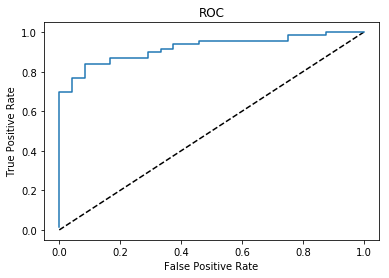

In [198]:
# ROC Curve with logistic regression
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

data = pd.read_csv('column_2C_weka.csv')
# abnormal = 1 and normal = 0
data['class_binary'] = [1 if i == 'Abnormal' else 0 for i in data.loc[:,'class']]
x,y = data.loc[:,(data.columns != 'class') & (data.columns != 'class_binary')], data.loc[:,'class_binary']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred_prob = logreg.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

In [208]:
data = pd.read_csv('column_2C_weka.csv')
data = pd.get_dummies(data).drop('class_Normal',axis=1)
data

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class_Abnormal
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,1
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,1
7,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871,1
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,1
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,1


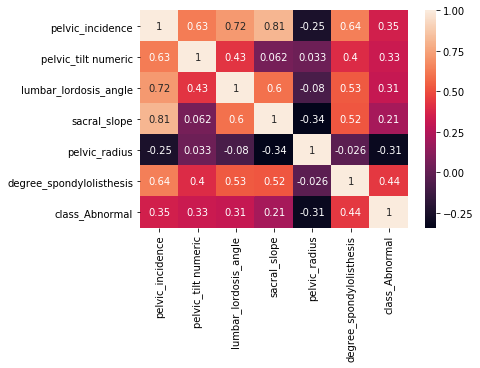

In [210]:
sns.heatmap(data.corr(),annot=True)

Text(0,0.5,'Inertia')

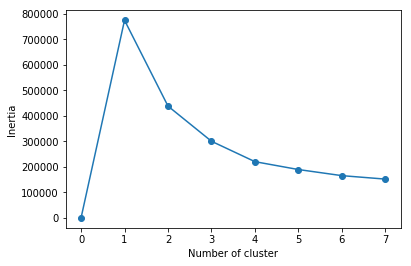

In [239]:
from sklearn.cluster import KMeans

inertia_list = [0]
for i in range(1,8):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(x)
    inertia_list.append(kmeans.inertia_)
plt.plot(range(0,8),inertia_list,'-o')
plt.xlabel('Number of cluster')
plt.ylabel('Inertia')